In [4]:
import pickle
# import os.path


In [6]:
from cyberleninka_articles_v2 import str2hexid

In [2]:
# with open('200394.pkl', mode='rb') as f:
#	 doc = pickle.load(f)

In [ ]:
# posts_dir = 'articles'

# def load_article(hrid=None, hexid=None):
#     hexid = str2hexid(hrid)  if hrid else  hexid
#     assert hexid
    
#     fpath = '{dir}/{hexid}.pkl'.format(dir=posts_dir, hexid=hexid)
#     print('loading:',fpath)
#     load_error = None

#     try:
#         with open(fpath, mode='rb') as f:
#             return pickle.load(f)
#     except FileNotFoundError as e:
#         load_error = e
    
#     if load_error:
#         print(load_error)
#     return None        

In [67]:
# load_article(113117)
a = load_article('081ec00b', dir="articles_2new")
a.keys()

loading: articles_2new/081ec00b.pkl


dict_keys(['year', 'url', 'text', 'article-ID', 'topic', 'title', 'keywords', 'number', 'abstract', 'similar', 'Authors', 'status'])

In [66]:
a["similar"]

[{'similarTitle': 'Использование мультиагентного онтологического подхода к созданию распределенных систем дистанционного обучения',
  'similar_url': '/article/n/ispolzovanie-multiagentnogo-ontologicheskogo-podhoda-k-sozdaniyu-raspredelennyh-sistem-distantsionnogo-obucheniya'},
 {'similarTitle': 'Архитектура и принципы самообучения конструкторско-технологических экспертных систем, основанных на знаниях с использованием мониторинга сети Интернет',
  'similar_url': '/article/n/arhitektura-i-printsipy-samoobucheniya-konstruktorsko-tehnologicheskih-ekspertnyh-sistem-osnovannyh-na-znaniyah-s-ispolzovaniem'},
 {'similarTitle': 'Технологии трансграничных цифровых сервисов в ЕС, формализованные онтологии и блокчейн',
  'similar_url': '/article/n/tehnologii-transgranichnyh-tsifrovyh-servisov-v-es-formalizovannye-ontologii-i-blokcheyn'},
 {'similarTitle': 'Разработка архитектуры базы знаний системы поддержки принятия врачебных решений, основанной на графовой базе данных',
  'similar_url': '/artic

In [118]:
MIN_KEYWORDS = 1

In [119]:
cyberlen_corpus = load_cyberlen_corpus(dir="articles", min_keywords=MIN_KEYWORDS) # articles_2new
# cyberlen_corpus = load_cyberlen_corpus()
len(cyberlen_corpus)

7603

In [50]:
cyberlen_corpus.sort(key=lambda p:-len(p['text']))

In [51]:
min_text_len = 10000

for i in range(len(cyberlen_corpus)-1, 0-1, -1):
#     print(i)
    if len(cyberlen_corpus[i]['text']) < min_text_len:
        del cyberlen_corpus[i]

In [52]:
text_lens = [len(p['text']) for p in cyberlen_corpus]
len(text_lens)

5857

In [21]:
min(text_lens), max(text_lens), sum(text_lens)/len(text_lens)

(10001, 161034, 19734.481475157932)

In [22]:
import pandas as pd

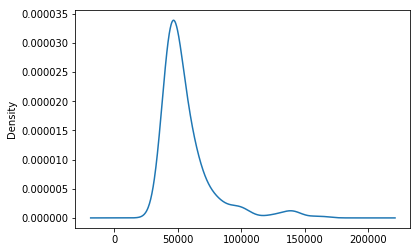

In [24]:
pd.Series(text_lens[:200]).plot('kde')

In [27]:
re_bib_caption = re.compile(r"^((?:[\w\s:.-]+?$){,3})\s*^1\.", re.M)

for a in cyberlen_corpus:
    t = a["text"]
    captions = re_bib_caption.findall(t)
    if captions:
        print('=====')
        for c in captions:
            print('-----')
            print(c)
    

=====
-----
3Узел
=====
-----
а
0 049
0.0981 0 1962 0.4905
=====
-----
Г рафик функций
Функционал ошибки
=====
-----

-----
Ориентированы на представление только бизнеслогики. Делятся на две группы:
-----

-----

-----

-----

=====
-----

-----

=====
-----
Алгоритм текущей и прогнозной зонной оценки состояния параметра с использованием режимной карты выглядит следующим образом:
=====
-----

-----

=====
-----
На рис. 1 приведен график изменения трудности вариантов теста по математике.
0 38 0. 39
п
0 22 0 23 0 24
0 0С 0 09 п П П П
=====
-----

-----

=====
-----

-----

-----

=====
-----
правилами:
=====
-----

=====
-----
Подсистема визуализации
1.2
1
0.8 0.6 0.4 0.2 0
-0.28
-----

=====
-----
0
=====
-----

-----

-----

=====
-----

=====
-----

-----
Рис. 2. Интерфейс Solution Manager по определению системного окружения
-----
1	Подготовка проекта
-----

-----

-----

-----

=====
-----
1.1.	Уровень операции. Задается на домене целых неотрицательных чисел и задает число компоненто

In [35]:
def find_all_indices_in_str(what,text):
    a = []
    s = 0
#     p = 0
    while True:
        p = text.find(what, s)
        if p == -1:
            break
            
        a.append(p)
        s = p + 1
        
    return a


In [36]:
find_all_indices_in_str('1', "123451234512345")

[0, 5, 10]

In [51]:
needle = '@'

pos_list = []


for a in cyberlen_corpus:
    t = a["text"]
    ps = find_all_indices_in_str(needle, t)
    ps = [p / len(t) for p in ps]
    if ps:
        ps = [ps[0]]
    pos_list.extend(ps)
    
len(pos_list)

314

In [38]:
import pandas as pd

In [52]:
s = pd.Series(pos_list)

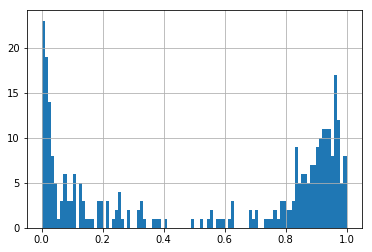

In [121]:
s.hist(bins=100)

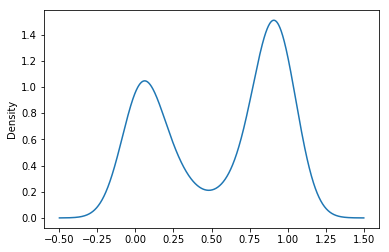

In [122]:
s.plot('kde')

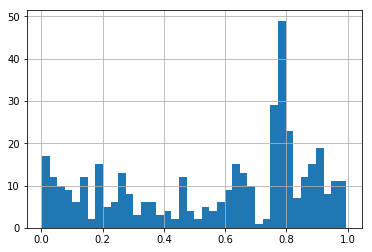

In [49]:
# по 400 (1)

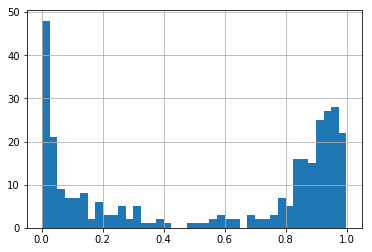

In [53]:
по 900 (1)

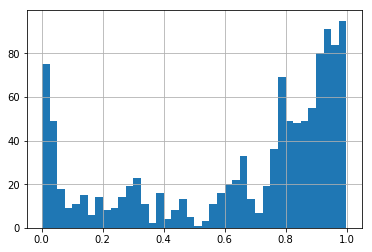

In [42]:
# по 900 старый

In [54]:
a = pos_list[:]


In [55]:
b = list(filter(lambda p:p<0.1, a))
len(b)

85

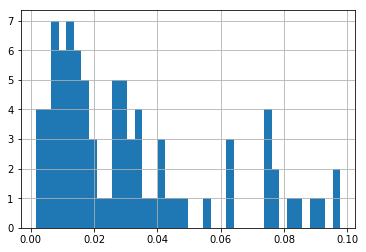

In [56]:
pd.Series(b).hist(bins=40)

In [82]:
t=['Federation. E-mail: ambelevtsev@yandex.ru.3456', 'South Federal University.E-mail: kgv_rostov@mail.ru.App.\n 47 @ 488',
  '. .E-mail: pakulova_e@mail.ru.347928',
   'f_Higher Vocational Education “Southern Federal University.E-mail: pakulova_e@mail.ru.Block\n privet']
shab = r'E-mail\s*\:\s*\w+@\w+\..+\n(?=[^@]*$)'
for st in t:
    matchObj = re.search(shab, st, flags=re.IGNORECASE)
    print(matchObj)

None
None
None
<_sre.SRE_Match object; span=(59, 92), match='E-mail: pakulova_e@mail.ru.Block\n'>


In [25]:
from Articles_Collect import get_SimilarArticles, clearPreviewsCash

In [120]:
joined = {}
# for i in range(5000):
#     a = cyberlen_corpus[i]
for i,a in enumerate(cyberlen_corpus):

#     print(len(a["text"])) #,a.keys())

    articles = get_SimilarArticles(a, lambda a: len(a["keywords"])>=MIN_KEYWORDS, 50, '.', recursive=1)
#     print(i,':', len(articles))
    joined[i] = (len(articles) , articles)

20263. Не найден файл со статьей   "./articles/e26a4bf2.pkl"
20264. Не найден файл со статьей   "./articles/9afdd99d.pkl"
20265. Не найден файл со статьей   "./articles/cb02cfc5.pkl"
20266. Не найден файл со статьей   "./articles/86351639.pkl"
Добавлено по "Authors": 4650
20267. Не найден файл со статьей   "./articles/25923f34.pkl"
20268. Не найден файл со статьей   "./articles/b18d84d2.pkl"
20269. Не найден файл со статьей   "./articles/ada3c8e5.pkl"
20270. Не найден файл со статьей   "./articles/d735330e.pkl"
20271. Не найден файл со статьей   "./articles/f32d1b37.pkl"
20272. Не найден файл со статьей   "./articles/55a76abc.pkl"
Добавлено по "Authors": 336
20273. Не найден файл со статьей   "./articles/821b0d76.pkl"
20274. Не найден файл со статьей   "./articles/d136522a.pkl"
20275. Не найден файл со статьей   "./articles/366d47cb.pkl"
20276. Не найден файл со статьей   "./articles/8e847c63.pkl"
20277. Не найден файл со статьей   "./articles/f028cd9c.pkl"
20278. Не найден файл со ста

20393. Не найден файл со статьей   "./articles/fddb2c51.pkl"
20394. Не найден файл со статьей   "./articles/a016db50.pkl"
20395. Не найден файл со статьей   "./articles/df9573de.pkl"
Добавлено по "Authors": 6570
20396. Не найден файл со статьей   "./articles/06f77fa7.pkl"
Не найден файл со списком статей категории  "./topic/Общие_и_комплексные_проблемы_технических_и_прикладных_на.pkl"
Не найден файл со списком статей категории  "./topic/Свойства_и_структура_материалов.pkl"
20397. Не найден файл со статьей   "./articles/3866aebb.pkl"
20398. Не найден файл со статьей   "./articles/213defd2.pkl"
20399. Не найден файл со статьей   "./articles/4e41f88b.pkl"
20400. Не найден файл со статьей   "./articles/d752bcf6.pkl"
20401. Не найден файл со статьей   "./articles/56ff533e.pkl"
Добавлено по "Authors": 536
20402. Не найден файл со статьей   "./articles/84f0119c.pkl"
20403. Не найден файл со статьей   "./articles/b44d1259.pkl"
20404. Не найден файл со статьей   "./articles/9f146f14.pkl"
20405.

20518. Не найден файл со статьей   "./articles/d78fe5df.pkl"
20519. Не найден файл со статьей   "./articles/59e7c124.pkl"
20520. Не найден файл со статьей   "./articles/2a676a17.pkl"
20521. Не найден файл со статьей   "./articles/ddd91ea6.pkl"
20522. Не найден файл со статьей   "./articles/a3782a2f.pkl"
20523. Не найден файл со статьей   "./articles/da884262.pkl"
20524. Не найден файл со статьей   "./articles/38fe86a2.pkl"
20525. Не найден файл со статьей   "./articles/cfde199d.pkl"
Добавлено по "Authors": 614
20526. Не найден файл со статьей   "./articles/7d4c3a8d.pkl"
Добавлено по "Authors": 5786
20527. Не найден файл со статьей   "./articles/8b847f09.pkl"
20528. Не найден файл со статьей   "./articles/144b03ac.pkl"
20529. Не найден файл со статьей   "./articles/ec91f445.pkl"
20530. Не найден файл со статьей   "./articles/31cd2a2a.pkl"
Добавлено по "Authors": 7969
20531. Не найден файл со статьей   "./articles/2ce94359.pkl"
Добавлено по "similar": 297
20532. Не найден файл со статьей

20644. Не найден файл со статьей   "./articles/8205f579.pkl"
20645. Не найден файл со статьей   "./articles/e28eb278.pkl"
20646. Не найден файл со статьей   "./articles/e001c20d.pkl"
Добавлено по "Authors": 193
20647. Не найден файл со статьей   "./articles/8d99692a.pkl"
20648. Не найден файл со статьей   "./articles/9e88eed8.pkl"
20649. Не найден файл со статьей   "./articles/5d4f516f.pkl"
Добавлено по "Authors": 7728
20650. Не найден файл со статьей   "./articles/d2d20c73.pkl"
20651. Не найден файл со статьей   "./articles/e110df46.pkl"
20652. Не найден файл со статьей   "./articles/3a9a9c4d.pkl"
20653. Не найден файл со статьей   "./articles/694bbae9.pkl"
20654. Не найден файл со статьей   "./articles/ae434571.pkl"
20655. Не найден файл со статьей   "./articles/48712060.pkl"
20656. Не найден файл со статьей   "./articles/58b65c80.pkl"
Добавлено по "Authors": 3404
20657. Не найден файл со статьей   "./articles/253f8e4d.pkl"
20658. Не найден файл со статьей   "./articles/3d56719f.pkl"

20766. Не найден файл со статьей   "./articles/3fa7d2f6.pkl"
20767. Не найден файл со статьей   "./articles/3ef06207.pkl"
20768. Не найден файл со статьей   "./articles/90e24405.pkl"
20769. Не найден файл со статьей   "./articles/10428c45.pkl"
20770. Не найден файл со статьей   "./articles/dbf32c2e.pkl"
20771. Не найден файл со статьей   "./articles/e6f771b2.pkl"
20772. Не найден файл со статьей   "./articles/466a79e1.pkl"
20773. Не найден файл со статьей   "./articles/89b1f094.pkl"
20774. Не найден файл со статьей   "./articles/fe1929a7.pkl"
Добавлено по "Authors": 4383
20775. Не найден файл со статьей   "./articles/2f3d3afa.pkl"
20776. Не найден файл со статьей   "./articles/56943acf.pkl"
20777. Не найден файл со статьей   "./articles/75bccff1.pkl"
20778. Не найден файл со статьей   "./articles/55df35c8.pkl"
Добавлено по "Authors": 8442
Не найден файл со списком статей категории  "./topic/Общие_и_комплексные_проблемы_технических_и_прикладных_на.pkl"
20779. Не найден файл со статьей  

20892. Не найден файл со статьей   "./articles/79b69ff4.pkl"
20893. Не найден файл со статьей   "./articles/5c706986.pkl"
20894. Не найден файл со статьей   "./articles/40c346c2.pkl"
20895. Не найден файл со статьей   "./articles/89ef4e7b.pkl"
20896. Не найден файл со статьей   "./articles/599220fa.pkl"
20897. Не найден файл со статьей   "./articles/1ef156ad.pkl"
20898. Не найден файл со статьей   "./articles/21848940.pkl"
20899. Не найден файл со статьей   "./articles/581ac5a3.pkl"
Добавлено по "Authors": 9782
20900. Не найден файл со статьей   "./articles/375fd036.pkl"
20901. Не найден файл со статьей   "./articles/3efdcb11.pkl"
20902. Не найден файл со статьей   "./articles/2b22f1a3.pkl"
20903. Не найден файл со статьей   "./articles/2118105d.pkl"
20904. Не найден файл со статьей   "./articles/7116e330.pkl"
Добавлено по "Authors": 5010
Не найден файл со списком статей категории  "./topic/Автомобильные_дороги.pkl"
20905. Не найден файл со статьей   "./articles/3251421f.pkl"
20906. Не

21011. Не найден файл со статьей   "./articles/8efe6814.pkl"
21012. Не найден файл со статьей   "./articles/b5b92d69.pkl"
21013. Не найден файл со статьей   "./articles/bb206698.pkl"
21014. Не найден файл со статьей   "./articles/33f2f16f.pkl"
21015. Не найден файл со статьей   "./articles/92d7a22f.pkl"
21016. Не найден файл со статьей   "./articles/a23c9139.pkl"
21017. Не найден файл со статьей   "./articles/643cd53b.pkl"
Добавлено по "similar": 7440
21018. Не найден файл со статьей   "./articles/8feb980d.pkl"
21019. Не найден файл со статьей   "./articles/c0b13bbc.pkl"
21020. Не найден файл со статьей   "./articles/b14bb83c.pkl"
21021. Не найден файл со статьей   "./articles/a6a9bbce.pkl"
21022. Не найден файл со статьей   "./articles/2e874ac1.pkl"
Добавлено по "Authors": 9542
21023. Не найден файл со статьей   "./articles/95d57464.pkl"
21024. Не найден файл со статьей   "./articles/8c8d5431.pkl"
Добавлено по "Authors": 7608
21025. Не найден файл со статьей   "./articles/e8556b47.pkl

21134. Не найден файл со статьей   "./articles/814bb568.pkl"
21135. Не найден файл со статьей   "./articles/dca34721.pkl"
21136. Не найден файл со статьей   "./articles/35ba4382.pkl"
21137. Не найден файл со статьей   "./articles/7d4a9de4.pkl"
Добавлено по "Authors": 7931
21138. Не найден файл со статьей   "./articles/d25d9227.pkl"
21139. Не найден файл со статьей   "./articles/79a90178.pkl"
21140. Не найден файл со статьей   "./articles/d7442030.pkl"
21141. Не найден файл со статьей   "./articles/0549b42c.pkl"
Добавлено по "Authors": 4317
Не найден файл со списком статей категории  "./topic/Общие_и_комплексные_проблемы_технических_и_прикладных_на.pkl"
21142. Не найден файл со статьей   "./articles/0b597933.pkl"
Добавлено по "Authors": 6667
21143. Не найден файл со статьей   "./articles/ff99d21f.pkl"
21144. Не найден файл со статьей   "./articles/2f9d1239.pkl"
21145. Не найден файл со статьей   "./articles/7be7384e.pkl"
21146. Не найден файл со статьей   "./articles/d0388673.pkl"
Добав

21254. Не найден файл со статьей   "./articles/37507290.pkl"
21255. Не найден файл со статьей   "./articles/39cc429f.pkl"
21256. Не найден файл со статьей   "./articles/493b0458.pkl"
21257. Не найден файл со статьей   "./articles/74fd1e8e.pkl"
21258. Не найден файл со статьей   "./articles/608aa1b1.pkl"
Добавлено по "Authors": 3642
21259. Не найден файл со статьей   "./articles/975557f7.pkl"
21260. Не найден файл со статьей   "./articles/539eccb8.pkl"
21261. Не найден файл со статьей   "./articles/527a61b9.pkl"
21262. Не найден файл со статьей   "./articles/0b620488.pkl"
21263. Не найден файл со статьей   "./articles/f3fa491d.pkl"
21264. Не найден файл со статьей   "./articles/68357d35.pkl"
Добавлено по "Authors": 292
21265. Не найден файл со статьей   "./articles/d7dae7d2.pkl"
21266. Не найден файл со статьей   "./articles/278f6509.pkl"
Добавлено по "Authors": 7174
21267. Не найден файл со статьей   "./articles/4ee228e1.pkl"
21268. Не найден файл со статьей   "./articles/4c2cdb2b.pkl"

21374. Не найден файл со статьей   "./articles/7eb405b4.pkl"
21375. Не найден файл со статьей   "./articles/6da4ff5f.pkl"
21376. Не найден файл со статьей   "./articles/fa1a9c97.pkl"
21377. Не найден файл со статьей   "./articles/456e460b.pkl"
21378. Не найден файл со статьей   "./articles/9423ccc1.pkl"
21379. Не найден файл со статьей   "./articles/42cbd2e9.pkl"
21380. Не найден файл со статьей   "./articles/f9434d48.pkl"
21381. Не найден файл со статьей   "./articles/4f460d76.pkl"
21382. Не найден файл со статьей   "./articles/2b6ce166.pkl"
21383. Не найден файл со статьей   "./articles/cd70ce32.pkl"
21384. Не найден файл со статьей   "./articles/b78cb1ca.pkl"
Добавлено по "Authors": 7980
21385. Не найден файл со статьей   "./articles/2fa419bb.pkl"
21386. Не найден файл со статьей   "./articles/0f0d32ef.pkl"
21387. Не найден файл со статьей   "./articles/b82fa6d5.pkl"
21388. Не найден файл со статьей   "./articles/02a9c886.pkl"
21389. Не найден файл со статьей   "./articles/0b990c5a.

21503. Не найден файл со статьей   "./articles/907c6d78.pkl"
21504. Не найден файл со статьей   "./articles/2efca9ce.pkl"
Добавлено по "Authors": 4019
21505. Не найден файл со статьей   "./articles/081bc696.pkl"
21506. Не найден файл со статьей   "./articles/9d065e69.pkl"
21507. Не найден файл со статьей   "./articles/5eee03cd.pkl"
21508. Не найден файл со статьей   "./articles/1f5c2ec4.pkl"
21509. Не найден файл со статьей   "./articles/dcba3fa6.pkl"
Добавлено по "Authors": 6187
21510. Не найден файл со статьей   "./articles/827c5ff1.pkl"
21511. Не найден файл со статьей   "./articles/be4b568d.pkl"
21512. Не найден файл со статьей   "./articles/aec6b739.pkl"
21513. Не найден файл со статьей   "./articles/e7ef24e4.pkl"
21514. Не найден файл со статьей   "./articles/a4302b99.pkl"
Добавлено по "Authors": 1588
21515. Не найден файл со статьей   "./articles/079c5a4b.pkl"
21516. Не найден файл со статьей   "./articles/52d792f3.pkl"
21517. Не найден файл со статьей   "./articles/c25d19fb.pkl

21627. Не найден файл со статьей   "./articles/4130f1bc.pkl"
21628. Не найден файл со статьей   "./articles/3a13495e.pkl"
21629. Не найден файл со статьей   "./articles/0b53bfec.pkl"
21630. Не найден файл со статьей   "./articles/4617c3a6.pkl"
Добавлено по "Authors": 9599
21631. Не найден файл со статьей   "./articles/96bc0e85.pkl"
Добавлено по "Authors": 4089
21632. Не найден файл со статьей   "./articles/1b9ffc0c.pkl"
21633. Не найден файл со статьей   "./articles/beed3302.pkl"
21634. Не найден файл со статьей   "./articles/b0c9d00c.pkl"
21635. Не найден файл со статьей   "./articles/7931cdfb.pkl"
Добавлено по "Authors": 6183
21636. Не найден файл со статьей   "./articles/11fab92c.pkl"
21637. Не найден файл со статьей   "./articles/ad4cacbf.pkl"
21638. Не найден файл со статьей   "./articles/2f8e95c0.pkl"
21639. Не найден файл со статьей   "./articles/7b1011f5.pkl"
Добавлено по "Authors": 3360
21640. Не найден файл со статьей   "./articles/ed00d4ec.pkl"
21641. Не найден файл со стать

21746. Не найден файл со статьей   "./articles/0e7b7565.pkl"
21747. Не найден файл со статьей   "./articles/eb129751.pkl"
21748. Не найден файл со статьей   "./articles/b568a276.pkl"
21749. Не найден файл со статьей   "./articles/efc0197b.pkl"
21750. Не найден файл со статьей   "./articles/0bb4bc89.pkl"
Добавлено по "Authors": 3387
21751. Не найден файл со статьей   "./articles/b039e229.pkl"
21752. Не найден файл со статьей   "./articles/05ba3328.pkl"
21753. Не найден файл со статьей   "./articles/5b8936e7.pkl"
21754. Не найден файл со статьей   "./articles/dd6bc6c6.pkl"
21755. Не найден файл со статьей   "./articles/7bcef916.pkl"
Добавлено по "Authors": 1168
21756. Не найден файл со статьей   "./articles/221f042d.pkl"
21757. Не найден файл со статьей   "./articles/ac4c0ea6.pkl"
Добавлено по "Authors": 2599
Не найден файл со списком статей категории  "./topic/Механика.pkl"
21758. Не найден файл со статьей   "./articles/82bc4dd5.pkl"
21759. Не найден файл со статьей   "./articles/97167f

21868. Не найден файл со статьей   "./articles/502d2f88.pkl"
21869. Не найден файл со статьей   "./articles/5d8a3b79.pkl"
21870. Не найден файл со статьей   "./articles/d7388e4f.pkl"
21871. Не найден файл со статьей   "./articles/1bd04573.pkl"
21872. Не найден файл со статьей   "./articles/deebc7fb.pkl"
Добавлено по "Authors": 7708
21873. Не найден файл со статьей   "./articles/7990e2e3.pkl"
21874. Не найден файл со статьей   "./articles/1e518204.pkl"
Добавлено по "Authors": 4225
21875. Не найден файл со статьей   "./articles/f4907736.pkl"
21876. Не найден файл со статьей   "./articles/17eb8eba.pkl"
21877. Не найден файл со статьей   "./articles/df1a5bd6.pkl"
Добавлено по "Authors": 4875
21878. Не найден файл со статьей   "./articles/7048bddd.pkl"
21879. Не найден файл со статьей   "./articles/36a9bc0d.pkl"
21880. Не найден файл со статьей   "./articles/52fde8e3.pkl"
21881. Не найден файл со статьей   "./articles/661d6a4e.pkl"
21882. Не найден файл со статьей   "./articles/3717c1f2.pkl

21990. Не найден файл со статьей   "./articles/609efc71.pkl"
21991. Не найден файл со статьей   "./articles/6e216cdd.pkl"
21992. Не найден файл со статьей   "./articles/fa3ca2ff.pkl"
21993. Не найден файл со статьей   "./articles/c6f46a37.pkl"
21994. Не найден файл со статьей   "./articles/96b0ca0d.pkl"
Добавлено по "Authors": 144
21995. Не найден файл со статьей   "./articles/07f92c74.pkl"
21996. Не найден файл со статьей   "./articles/2df5fd6b.pkl"
21997. Не найден файл со статьей   "./articles/d6506c2e.pkl"
21998. Не найден файл со статьей   "./articles/32f3f7cb.pkl"
21999. Не найден файл со статьей   "./articles/7de4485d.pkl"
Добавлено по "Authors": 9837
22000. Не найден файл со статьей   "./articles/f2774f9c.pkl"
22001. Не найден файл со статьей   "./articles/13ab3b6a.pkl"
22002. Не найден файл со статьей   "./articles/1677cd7e.pkl"
22003. Не найден файл со статьей   "./articles/3dda16d9.pkl"
22004. Не найден файл со статьей   "./articles/55507c69.pkl"
Добавлено по "Authors": 3151

22113. Не найден файл со статьей   "./articles/68c9da82.pkl"
22114. Не найден файл со статьей   "./articles/c7e2eb38.pkl"
Добавлено по "Authors": 6327
22115. Не найден файл со статьей   "./articles/a09c8791.pkl"
22116. Не найден файл со статьей   "./articles/3e6fbf26.pkl"
22117. Не найден файл со статьей   "./articles/ba8baa16.pkl"
22118. Не найден файл со статьей   "./articles/b557b30f.pkl"
22119. Не найден файл со статьей   "./articles/e387c798.pkl"
22120. Не найден файл со статьей   "./articles/96fa062d.pkl"
22121. Не найден файл со статьей   "./articles/7ad43034.pkl"
Добавлено по "Authors": 4379
22122. Не найден файл со статьей   "./articles/8f589eb4.pkl"
Добавлено по "similar": 9530
22123. Не найден файл со статьей   "./articles/3298f8de.pkl"
Добавлено по "Authors": 862
22124. Не найден файл со статьей   "./articles/317118fd.pkl"
22125. Не найден файл со статьей   "./articles/025f3ca7.pkl"
22126. Не найден файл со статьей   "./articles/219efacd.pkl"
22127. Не найден файл со статье

Добавлено по "similar": 10402
22232. Не найден файл со статьей   "./articles/12f5a083.pkl"
22233. Не найден файл со статьей   "./articles/75a91318.pkl"
22234. Не найден файл со статьей   "./articles/1a2324a2.pkl"
Добавлено по "Authors": 10554
22235. Не найден файл со статьей   "./articles/c1d02442.pkl"
22236. Не найден файл со статьей   "./articles/9bea4e7d.pkl"
22237. Не найден файл со статьей   "./articles/83fadcb1.pkl"
22238. Не найден файл со статьей   "./articles/11a0c360.pkl"
22239. Не найден файл со статьей   "./articles/b69a7281.pkl"
22240. Не найден файл со статьей   "./articles/8114cbeb.pkl"
Не найден файл со списком статей категории  "./topic/Физика.pkl"
22241. Не найден файл со статьей   "./articles/10eac31b.pkl"
22242. Не найден файл со статьей   "./articles/98b4cdd5.pkl"
22243. Не найден файл со статьей   "./articles/18ba32ad.pkl"
22244. Не найден файл со статьей   "./articles/568176c7.pkl"
22245. Не найден файл со статьей   "./articles/8ec5f985.pkl"
22246. Не найден файл

22353. Не найден файл со статьей   "./articles/937434bb.pkl"
22354. Не найден файл со статьей   "./articles/fd771712.pkl"
22355. Не найден файл со статьей   "./articles/fb3920fe.pkl"
22356. Не найден файл со статьей   "./articles/6747b83a.pkl"
22357. Не найден файл со статьей   "./articles/3be5978e.pkl"
22358. Не найден файл со статьей   "./articles/8bf0f031.pkl"
22359. Не найден файл со статьей   "./articles/e71a4864.pkl"
22360. Не найден файл со статьей   "./articles/880c76f9.pkl"
22361. Не найден файл со статьей   "./articles/87a0dddd.pkl"
22362. Не найден файл со статьей   "./articles/32f58be7.pkl"
22363. Не найден файл со статьей   "./articles/2182df3a.pkl"
22364. Не найден файл со статьей   "./articles/68605c4b.pkl"
22365. Не найден файл со статьей   "./articles/5e27785d.pkl"
Добавлено по "Authors": 517
22366. Не найден файл со статьей   "./articles/9331f000.pkl"
22367. Не найден файл со статьей   "./articles/c87caf63.pkl"
22368. Не найден файл со статьей   "./articles/ade74ef4.p

22480. Не найден файл со статьей   "./articles/5b0c6d6f.pkl"
22481. Не найден файл со статьей   "./articles/527c3f49.pkl"
22482. Не найден файл со статьей   "./articles/e2c66911.pkl"
22483. Не найден файл со статьей   "./articles/db2b7379.pkl"
22484. Не найден файл со статьей   "./articles/eb96f4a8.pkl"
Добавлено по "Authors": 984
22485. Не найден файл со статьей   "./articles/c1002ac7.pkl"
22486. Не найден файл со статьей   "./articles/4db23d96.pkl"
22487. Не найден файл со статьей   "./articles/1e8d166f.pkl"
22488. Не найден файл со статьей   "./articles/bf293324.pkl"
Добавлено по "Authors": 7940
22489. Не найден файл со статьей   "./articles/61b05a23.pkl"
22490. Не найден файл со статьей   "./articles/dc43d577.pkl"
22491. Не найден файл со статьей   "./articles/787110c8.pkl"
22492. Не найден файл со статьей   "./articles/e677c5d0.pkl"
22493. Не найден файл со статьей   "./articles/7c426893.pkl"
Добавлено по "Authors": 7188
22494. Не найден файл со статьей   "./articles/acdbbe3f.pkl"

22608. Не найден файл со статьей   "./articles/dedba0d7.pkl"
22609. Не найден файл со статьей   "./articles/e03d0f50.pkl"
22610. Не найден файл со статьей   "./articles/491c9d40.pkl"
22611. Не найден файл со статьей   "./articles/663aecb0.pkl"
22612. Не найден файл со статьей   "./articles/185f255a.pkl"
Добавлено по "Authors": 7833
22613. Не найден файл со статьей   "./articles/64980007.pkl"
22614. Не найден файл со статьей   "./articles/bb4e71cd.pkl"
22615. Не найден файл со статьей   "./articles/9b4378ec.pkl"
Добавлено по "Authors": 3983
22616. Не найден файл со статьей   "./articles/f93c196d.pkl"
22617. Не найден файл со статьей   "./articles/f35648e3.pkl"
22618. Не найден файл со статьей   "./articles/7804e618.pkl"
22619. Не найден файл со статьей   "./articles/95cbf0cd.pkl"
22620. Не найден файл со статьей   "./articles/ca45e56b.pkl"
22621. Не найден файл со статьей   "./articles/af2fe562.pkl"
Добавлено по "Authors": 10550
22622. Не найден файл со статьей   "./articles/95dec4fd.pk

22732. Не найден файл со статьей   "./articles/05f26f1c.pkl"
22733. Не найден файл со статьей   "./articles/019e397f.pkl"
Добавлено по "Authors": 8406
22734. Не найден файл со статьей   "./articles/dda3d41e.pkl"
22735. Не найден файл со статьей   "./articles/d5e493c0.pkl"
22736. Не найден файл со статьей   "./articles/523fb269.pkl"
22737. Не найден файл со статьей   "./articles/f81bf12b.pkl"
22738. Не найден файл со статьей   "./articles/651c9f2e.pkl"
Добавлено по "Authors": 4023
22739. Не найден файл со статьей   "./articles/73076b56.pkl"
22740. Не найден файл со статьей   "./articles/7de23925.pkl"
22741. Не найден файл со статьей   "./articles/9e869d09.pkl"
22742. Не найден файл со статьей   "./articles/fd0d8a23.pkl"
Добавлено по "Authors": 9667
22743. Не найден файл со статьей   "./articles/1eb20b4d.pkl"
22744. Не найден файл со статьей   "./articles/348a2300.pkl"
Добавлено по "Authors": 3841
22745. Не найден файл со статьей   "./articles/c9fbdb80.pkl"
22746. Не найден файл со стать

22855. Не найден файл со статьей   "./articles/d7906c6b.pkl"
22856. Не найден файл со статьей   "./articles/38506623.pkl"
22857. Не найден файл со статьей   "./articles/0c724fb7.pkl"
22858. Не найден файл со статьей   "./articles/bee241d0.pkl"
22859. Не найден файл со статьей   "./articles/eb0b92c3.pkl"
22860. Не найден файл со статьей   "./articles/fda0c38b.pkl"
22861. Не найден файл со статьей   "./articles/3b9d7649.pkl"
22862. Не найден файл со статьей   "./articles/0b244e44.pkl"
22863. Не найден файл со статьей   "./articles/c7cf5c83.pkl"
Добавлено по "Authors": 4964
22864. Не найден файл со статьей   "./articles/664367da.pkl"
22865. Не найден файл со статьей   "./articles/33df901c.pkl"
Добавлено по "Authors": 786
22866. Не найден файл со статьей   "./articles/88b5a77f.pkl"
22867. Не найден файл со статьей   "./articles/d55789b3.pkl"
22868. Не найден файл со статьей   "./articles/aaab3639.pkl"
22869. Не найден файл со статьей   "./articles/3b789dd8.pkl"
22870. Не найден файл со ста

22979. Не найден файл со статьей   "./articles/370f0bbd.pkl"
Добавлено по "Authors": 9490
22980. Не найден файл со статьей   "./articles/fbf49b28.pkl"
22981. Не найден файл со статьей   "./articles/d50a7795.pkl"
Добавлено по "Authors": 9172
22982. Не найден файл со статьей   "./articles/bea3b573.pkl"
22983. Не найден файл со статьей   "./articles/2025de83.pkl"
22984. Не найден файл со статьей   "./articles/e80bcafe.pkl"
22985. Не найден файл со статьей   "./articles/275c0184.pkl"
22986. Не найден файл со статьей   "./articles/013939a5.pkl"
22987. Не найден файл со статьей   "./articles/45a531c0.pkl"
22988. Не найден файл со статьей   "./articles/1127561f.pkl"
22989. Не найден файл со статьей   "./articles/c94ee8b8.pkl"
22990. Не найден файл со статьей   "./articles/2c930ceb.pkl"
22991. Не найден файл со статьей   "./articles/42e6b71d.pkl"
Добавлено по "Authors": 7232
22992. Не найден файл со статьей   "./articles/e7ebec3e.pkl"
22993. Не найден файл со статьей   "./articles/1543b9ba.pkl

Не найден файл со списком статей категории  "./topic/Общие_и_комплексные_проблемы_технических_и_прикладных_на.pkl"
23101. Не найден файл со статьей   "./articles/b590776c.pkl"
23102. Не найден файл со статьей   "./articles/75462d13.pkl"
23103. Не найден файл со статьей   "./articles/f5455990.pkl"
23104. Не найден файл со статьей   "./articles/8387363e.pkl"
Добавлено по "Authors": 10739
Не найден файл со списком статей категории  "./topic/Математика.pkl"
23105. Не найден файл со статьей   "./articles/3f7f9557.pkl"
Не найден файл со списком статей категории  "./topic/Машиностроение.pkl"
23106. Не найден файл со статьей   "./articles/dca18038.pkl"
23107. Не найден файл со статьей   "./articles/9ab72051.pkl"
23108. Не найден файл со статьей   "./articles/d7af47d2.pkl"
23109. Не найден файл со статьей   "./articles/38acfa45.pkl"
23110. Не найден файл со статьей   "./articles/413e8846.pkl"
Добавлено по "Authors": 10678
23111. Не найден файл со статьей   "./articles/cd84adba.pkl"
Добавлено по

In [121]:
len(joined)

7603

In [122]:
for i in joined:
    n = joined[i][0]
    n > 0 and print(i, n)
    if n > 1:
        a_s = joined[i][1]
        keys = [(len(a['keywords']),a['keywords']) for a in a_s]
        for key in keys:
            print('\t', key)
        print('.')

9 1
31 1
53 1
56 1
61 1
78 2
	 (1, ['ДЛИТЕЛЬНОСТЬ ОБРАБОТКИ ИНФОРМАЦИИ'])
	 (1, ['SD-ROM ФИЛЬТР'])
.
83 1
129 1
132 3
	 (5, ['НАЗНАЧЕНИЕ ЗАДАЧ', 'СЕМАНТИКО-ЧИСЛОВАЯ СПЕЦИФИКАЦИЯ', 'КЛАСТЕРЫ ФРАГМЕНТОВ', 'ВРЕМЯПАРАМЕТРИЗОВАННЫЕ ПАРАЛЛЕЛЬНЫЕ МОДЕЛИ', 'МРР СИСТЕМЫ'])
	 (8, ['ГЛОБАЛИЗАЦИЯ', 'ВЫЗОВЫ РАЗВИТИЮ', 'РИСКИ И ОГРАНИЧЕНИЯ СОЦИАЛЬНО-ЭКОНОМИЧЕСКОГО РАЗВИТИЯ', 'РЕГИОНАЛЬНАЯ ПОЛИТИКА. СТРУКТУРЫ СЕМАНТИКО ЧИСЛОВОЙ СПЕЦИФИКАЦИИ (СЧС)', 'ВРЕМЯПАРАМЕТ-РИЗОВАННАЯ (ВРЕМЕННАЯ) ПАРАЛЛЕЛЬНАЯ МОДЕЛЬ СИ ПРОГРАММЫ', 'ВРЕМЕННАЯ ПАРАЛЛЕЛЬНАЯ ГРАФ СХЕМА (ВПГС)', 'СПЕЦПРОЦЕССОР С НЕПЕРЕСТРАИВА-ЕМОЙ АРХИТЕКТУРОЙ', 'ФОРМАЛЬНЫЙ ФУНКЦИОНАЛЬНЫЙ СИНТЕЗ ПАРАЛЛЕЛЬНЫХ АППАРАТНЫХ СРЕДСТВ'])
	 (2, ['АЛГОРИТМ ГАУССА', 'КЛАСТЕРНЫЕ ВЫЧИСЛИТЕЛЬНЫЕ СИСТЕМЫ (ВС)'])
.
138 1
155 1
163 1
167 1
174 1
202 1
212 1
232 1
233 1
237 1
244 2
	 (10, ['ДОКУМЕНТ', 'ШТРИХ-КОД', 'ДЕТЕКТИРОВАНИЕ', 'ЦВЕТНОЙ ШТРИХОВОЙ КОД', 'СВС', 'КОДИРОВАНИЕ', 'ЭЛЕКТРОННЫЙ ДОКУМЕНТ', 'ПЕЧАТНЫЙ ДОКУМЕНТ', 'МАРКЕР', 'МЕТКА'])
	 (9, ['ДОКУМЕНТ', 'ШТРИХ-

6789 1
6802 1
6805 1
6812 1
6813 1
6828 1
6830 1
6833 1
6845 1
6906 1
6910 1
6919 1
6930 1
6950 1
6951 1
6952 1
6958 1
6965 1
6972 2
	 (3, ['КАНАЛ С РЕЛЕЕВСКИМИ ЗАМИРАНИЯМИ', 'БИНОМИАЛЬНЫЙ КАНАЛ', 'СИНХРОНИЗАЦИЯ ПСП'])
	 (3, ['СИНХРОНИЗАЦИЯ', 'ПСЕВДОСЛУЧАЙНАЯ ПОСЛЕДОВАТЕЛЬНОСТЬ', 'АЛГОРИТМ СИНХРОНИЗАЦИИ ПСП'])
.
6991 1
7040 1
7050 1
7054 1
7055 1
7070 1
7099 1
7105 1
7122 1
7125 1
7133 1
7152 1
7156 1
7169 1
7184 1
7188 1
7215 1
7220 1
7232 1
7240 1
7245 1
7250 1
7260 1
7273 1
7313 1
7329 1
7331 1
7335 1
7338 1
7348 1
7372 1
7385 1
7387 1
7397 1
7398 1
7406 1
7439 1
7451 1
7479 1
7489 1
7516 1
7528 1
7560 1
7574 1
7589 1
7591 1
7596 1
7600 1


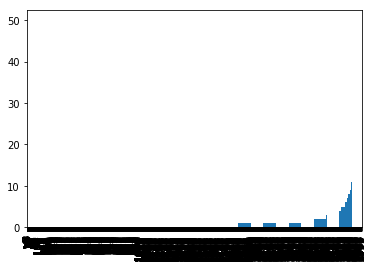

In [85]:
pd.Series(sorted([n for n,_ in joined.values() if n>=0])).plot('bar')

In [123]:

joined_up2 = [a_list for n,a_list in joined.values() if n>=2]
len(joined_up2)

51

In [124]:
sum([len(a_l) for a_l in joined_up2])

116

In [125]:
dump_data(joined_up2,'grouped_articles_min%dkeywords.pkl' % MIN_KEYWORDS)

saved joined_articles_min1keywords.pkl


In [112]:
import pickle

def dump_data(data, filepath):
    save_error = None
    try:
        with open(filepath, mode='wb') as f:
            pickle.dump(data, f)
    except Exception as e:
        save_error = e
    
    if save_error:
        print(save_error)
    else:
        print('saved', filepath)
    

In [157]:
class Article(object):
    """ Базовая Статья для хранения данных для оценки качества извлечения терминов """
    def __init__(self, text="", title="No-Title", expert_terms=None):
        self.text = text
        self.title = title
        self.expert_terms = expert_terms
        
#     def __getattribute__(self, attr):
#         if hasattr(self, attr):
#             a = getattr(self, attr)
#             if hasattr(a, "__call__"):
#                 return a.__call__(self)
#         #  else:
#         raise AttributeError(attr)
        
    def __repr__(self):
        return self.short_name()
        
    def __str__(self):
        return "<%s short-name='%s' text-size=%d>" % (
            self.__class__.__name__,
            self.short_name(),
            len(self.text)
        )
        
    def short_name(self):
        s = self.title
        if len(s) > 8:
            s = s[:8] + "."
        return s
        
    def expert_judgements(self):
        if not self.expert_terms:
            return []
        elif hasattr(self.expert_terms, "__iter__") and type(next(iter(self.expert_terms))) in (list,set,tuple):
            return self.expert_terms
        else:
            return [self.expert_terms]
            

In [158]:
class CyLenArticle(Article):
    def __init__(self, article_dict):
# copied_keys = ('article-ID','number','title','text', 'keywords', 'abstract', 'topic', 'Authors', 'similar')
        keys_as_expert = ('keywords', 'abstract', 'title', 'topic',)
        expert = {k:article_dict[k] for k in keys_as_expert}
        super().__init__(article_dict['text'],
                         article_dict['title'],
                         expert)
        self.ID = article_dict['article-ID']
        
    def short_name(self):
        s = self.ID
        if len(s) > 12:
            s = s[:12]
        return s
        

In [159]:
cyla = CyLenArticle(cyberlen_corpus[0])
print(cyla)

<CyLenArticle short-name='o-problemah-' text-size=17464>


In [161]:
cyla.expert_judgements()

[{'abstract': 'Возможность масштабирования становится одним из важнейших требований при разработке программно-аппаратных комплексов. Однако, задача определения возможности масштабирования системы не тривиальна, потому что зависимость между показателями, полученными на тестовом стенде и показателями реальной системы не всегда линейна. Данное исследование направлено на то, чтобы выработать набор универсальных правил и метрик, которые могли бы помочь ответить на вопрос о существовании возможности масштабирования системы, и, если таковая возможность есть, указать границы и возможности масштабирования.',
  'keywords': ['МАСШТАБИРУЕМОСТЬ',
   'УПРАВЛЕНИЕ КАЧЕСТВОМ',
   'ОБЕСПЕЧЕНИЕ КАЧЕСТВА',
   'СЛОЖНЫЕ СИСТЕМЫ'],
  'title': 'О проблемах определения возможностей масштабирования сложных систем',
  'topic': 'Автоматика. Вычислительная техника'}]

In [150]:
o

NameError: name 'o' is not defined